# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luk Letif"
COLLABORATORS = ""

---

In [2]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
from sklearn.datasets import load_breast_cancer
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Part 1: (45 pts) Entropy, information gain

For all the questions in this part, consider that the features are binary and the label is binary as well.

### (5 pts) Question 1: Entropy

Entropy is a measure of the impurity or disorder of a dataset. For a binary classification problem, the entropy of a dataset $ D $ is given by:

$$
H(D) = - p_+ \log_2 p_+ - p_- \log_2 p_-
$$

Where:
- $ p_+ $ is the proportion of positive examples in $ D $.
- $ p_- $ is the proportion of negative examples in $ D $.

If $ p_+ $ or $ p_- $ is $ 0 $, their respective term in the equation is considered to be $ 0 $ (since the logarithm of $ 0 $ is undefined).

**Task:**

Your task is to implement the entropy function based on the provided formula. Make sure to handle the edge cases where $ p_+ $ or $ p_- $ are $ 0 $.

- Hint: Sometimes, you need to accept an empty set (`len(target) == 0`), and you should return 0 entropy

In [5]:
def entropy(target: np.ndarray) -> float:
    """
    Compute the entropy of a dataset.
    
    Parameters:
    - target: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - H: A float representing the entropy of the dataset.
    """
    
    # YOUR CODE HERE
    # you need to accept an empty set (`len(target) == 0`), and you should return 0 entropy
    if len(target) == 0:
        return 0
    
    # - $ p_+ $ is the proportion of positive examples in $ D $.
    p_plus = np.sum(target)/len(target)
    p_minus = 1 - p_plus
    
    # If $ p_+ $ or $ p_- $ is $ 0 $, their respective term in
    #the equation is considered to be $ 0 $ (since the logarithm of $ 0 $ is undefined).
    if p_plus != 0:
        first_term  =  -p_plus * np.log2(p_plus)
    else:
        first_term = 0

    if p_minus != 0:
        second_term  =  -p_minus * np.log2(p_minus)
    else:
        second_term = 0
    # raise NotImplementedError()
    #H(D) = - p_+ \log_2 p_+ - p_- \log_2 p_-
    H  = first_term + second_term
    return H

In [6]:
# some examples
entropy(np.array([0, 1, 1]))

0.9182958340544896

In [7]:
entropy(np.array([0]))

0.0

In [8]:
# Test with a balanced dataset
y_test_1 = np.array([0, 1, 0, 1])
assert np.isclose(entropy(y_test_1), 1.0, atol=1e-5), "Test Case 1 Failed"
# Test with all negative examples
y_test_2 = np.array([0, 0, 0, 0])
assert np.isclose(entropy(y_test_2), 0.0, atol=1e-5), "Test Case 2 Failed"
# Test with all positive examples
y_test_3 = np.array([1, 1, 1, 1])
assert np.isclose(entropy(y_test_3), 0.0, atol=1e-5), "Test Case 3 Failed"

## (10 pts) Question 2: Information Gain

Information Gain (IG) is a measure of the effectiveness of an attribute in classifying the training data. It calculates the difference between the entropy of the dataset before the split and the weighted entropy of each branch after the split. The formula for computing IG is given by:

$$
IG(D, A) = H(D) - \sum_{v \in A} \left( \frac{|D_v|}{|D|} \times H(D_v) \right)
$$

Where:
- $ H(D) $ is the entropy of the dataset.
- $ A $ is the attribute or feature column we're considering.
- $ D_v $ is the subset of data for which attribute $ A $ has value $ v $.
- $ |D_v| $ is the number of samples in $ D_v $.
- $ |D| $ is the total number of samples.

**Task:**

Write a function `information_gain` to solve the problem.

Hint:
1. Start by computing the entropy of the dataset before the split.
2. Next, compute the weighted entropy of each branch after the split based on the feature column $x_j \leq v$ 
3. Return the difference between the initial entropy and the weighted sum of branch entropies.

In [9]:
def information_gain(X: np.ndarray, y: np.ndarray, j: int, v: float) -> float:
    """
    Compute the information gain of splitting the data based on feature column j.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    - j: An integer representing the target feature column index (0-indexed).
    - v: A floating point containing the value by which this column will be split
    
    Returns:
    - IG: A float representing the information gain of the split based on feature column j.
    """    
    # YOUR CODE HERE
    #$ H(D) $ is the entropy of the dataset.
    H_D = entropy(y)
    # floating point containing the value by which this column will be split
    D_v_left = y[np.where(X[:, j] <= v)] 
    D_v_tight = y[np.where(X[:, j] > v)]

    #IG(D, A) = H(D) - \sum_{v \in A} \left( \frac{|D_v|}{|D|} \times H(D_v) \right)
    entropy_sum  = (len(D_v_left)/len(y))*entropy(D_v_left) + (len(D_v_tight)/len(y))*entropy(D_v_tight)
    IG = H_D - entropy_sum
    # raise NotImplementedError()
    
    return IG

In [10]:
entropy(y_test_2)

0.0

In [11]:
# try your function here
entropy(np.array([0, 1, 1]))

0.9182958340544896

In [12]:
""" (10 pts) """
# Test Case 1: Binary Feature
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_test_1 = np.array([0, 1, 0, 1])
# Given that the threshold doesn't matter for binary features, we can still provide one
assert np.isclose(information_gain(X_test_1, y_test_1, 1, 0.5), 1.0, atol=1e-5), "Test Case 1 Failed"

# Test Case 2: Continuous Feature
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
y_test_2 = np.array([0, 1, 0, 1])
# Here, the threshold matters; we're checking the information gain when the split is made at 1.0 for feature 1
assert np.isclose(information_gain(X_test_2, y_test_2, 1, 1.0), 1.0, atol=1e-5), "Test Case 2 Failed"

# Test Case 3: Another Continuous Feature
X_test_3 = np.array([
    [0.5, 1.5, 2.5],
    [1.5, 0.5, 2.5],
    [2.5, 1.5, 1.5],
    [0.5, 0.5, 0.5]
])
y_test_3 = np.array([0, 1, 0, 1])
# Checking the information gain for a split made at 2.0 for feature 2
expected_IG_3 = 0.31127812445913283
assert np.isclose(information_gain(X_test_3, y_test_3, 2, 1.0), expected_IG_3, atol=1e-5), "Test Case 3 Failed"

### (10 pts) Question 3: Create a Function Representing a "Decision Stump"

A decision stump is a decision tree with just one split. It makes a decision based on whether a feature \(j\) is less than or equal to a value \(v\), and returns a specified value if the condition is met.

**Task:**

Write a function `create_decision_stump` with the following signature:

```python
def create_decision_stump(j: int, threshold: float, return_value: int) -> Callable[[np.ndarray], np.ndarray]:
    """
    Create a decision stump based on feature column j, a threshold value, and a specified return value if 
    the condition is met.
    
    Parameters:
    - j: An integer representing the feature column index (0-indexed) to base the decision on.
    - threshold: A float representing the threshold value to decide the split.
    - return_value: An integer (0 or 1) to return when the feature column value is less than or equal to the threshold.
    
    Returns:
    - decision_stump: A function that takes in a 2D numpy array and returns a 1D numpy array
                      with predictions, returning the specified value if the feature column value is less than or 
                      equal to the threshold, and the opposite value otherwise.
    """
    pass
```

In [13]:
from typing import Callable

def create_decision_stump(j: int, threshold: float, return_value: int) -> Callable[[np.ndarray], np.ndarray]:
    """
    Create a decision stump based on feature column j, a threshold value, and a specified return value if 
    the condition is met.
    
    Parameters:
    - j: An integer representing the feature column index (0-indexed) to base the decision on.
    - threshold: A float representing the threshold value to decide the split.
    - return_value: An integer (0 or 1) to return when the feature column value is less than or equal to the threshold.
    
    Returns:
    - decision_stump: A function that takes in a 2D numpy array and returns a 1D numpy array
                      with predictions, returning the specified value if the feature column value is less than or 
                      equal to the threshold, and the opposite value otherwise.
    """
    
    # YOUR CODE HERE
    #A function that takes in a 2D numpy array and returns a 1D numpy array
    # with predictions, returning the specified value if the feature column value is less than or 
    # equal to the threshold, and the opposite value otherwise.
    def decision_stump(X: np.ndarray) -> [np.ndarray]:
        # Check values at feature column j against the threshold
        condition_is_met = X[:, j] <= threshold
        
        # returning the specified value if the feature column value is less than or 
        # equal to the threshold, and the opposite value otherwise
        result = np.full(X.shape[0], 1 - return_value)
        
        # returns a specified value if the condition is met
        result[condition_is_met] = return_value
        
        return result
    # raise NotImplementedError()
    
    return decision_stump

In [14]:
# try it here
create_decision_stump(0, 0, 0)(np.array([[0, 0],[0, 0],[0, 0],[0, 0]]))

array([0, 0, 0, 0])

In [15]:
"""(10 pts) Some tests"""
# Test Case 1: Binary Feature
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
# Here, we expect all values less than or equal to 0 to be classified as 1, and others as 0
stump_1 = create_decision_stump(0, 0, 1)
assert np.array_equal(stump_1(X_test_1), np.array([1, 0, 0, 1])), "Test Case 1 Failed"

# Test Case 2: Continuous Feature
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
# We're checking the predictions when the split is made at 1.0 for feature 1
# Values less than or equal to 1.0 should be classified as 0, and others as 1
stump_2 = create_decision_stump(1, 1.0, 0)
assert np.array_equal(stump_2(X_test_2), np.array([1, 0, 1, 0])), "Test Case 2 Failed"

# Test Case 3: Another Continuous Feature
X_test_3 = np.array([
    [0.5, 1.5, 2.5],
    [1.5, 0.5, 2.5],
    [2.5, 1.5, 1.5],
    [0.5, 0.5, 0.5]
])
# Checking the predictions for a split made at 2.0 for feature 2
# Values less than or equal to 2.0 should be classified as 0, and others as 1
stump_3 = create_decision_stump(2, 2.0, 0)
assert np.array_equal(stump_3(X_test_3), np.array([1, 1, 0, 0])), "Test Case 3 Failed"

### (10 pts) Question 4: Best Feature to Split By

Using the previously defined `information_gain` function that now takes a threshold as a parameter, your task is to find the best feature and threshold to split the data on. Specifically, you should identify the feature and threshold that provides the highest information gain when used as a decision stump.

**Task:**

Write a function `best_feature_to_split` with the following signature:

```python
def best_feature_to_split(X: np.ndarray, y: np.ndarray) -> Tuple[int, float]:
    """
    Identify the best feature and threshold to split the dataset on based on information gain.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - j_best: An integer representing the index (0-indexed) of the best feature column to split on.
    - v_best: A float representing the best threshold to split the feature by.
    """
    pass
```

In [16]:
from typing import Tuple

def best_feature_to_split(X: np.ndarray, y: np.ndarray) -> Tuple[int, float]:
    """
    Identify the best feature and threshold to split the dataset on based on information gain.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - j_best: An integer representing the index (0-indexed) of the best feature column to split on.
    - v_best: A float representing the best threshold to split the feature by.
    """
    
    # YOUR CODE HERE
    #initialize
    best_ig, j_best, v_best = 0, 0, 0
    # Iterate X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    for j in range(X.shape[1]):
        
        # Iterate over thresholds to Identify the best feature and threshold to split the dataset on based on information gain
        for v in np.unique(X[:, j]):
            
            # Information Gain on feature j at threshold v
            IG = information_gain(X, y, j, v)
            
            # Update Information Gain
            if IG > best_ig:
                best_ig = IG
                j_best, v_best = j, v
    # raise NotImplementedError()
    
    return j_best, v_best

In [17]:
# try it here
best_feature_to_split((np.array([[0, 0],[0, 0],[0, 0],[0, 0]])),np.array([0, 0, 0, 0]))

(0, 0)

In [18]:
""" (10 pts)  """
# Test Case 1: Basic Test with Binary Features
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_test_1 = np.array([0, 1, 0, 1])
best_feature_1, best_threshold_1 = best_feature_to_split(X_test_1, y_test_1)
# Either feature provides no information gain as both have an equal number of 0s and 1s
# The threshold doesn't matter for binary features
assert best_threshold_1 in [0, 1], "Test Case 1 Failed"

# Test Case 2: Continuous Features
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
y_test_2 = np.array([0, 1, 0, 1])
best_feature_2, best_threshold_2 = best_feature_to_split(X_test_2, y_test_2)
# The second feature provides the maximum information gain when split at 1.0
assert best_feature_2 == 1 and np.isclose(best_threshold_2, 0.5, atol=1e-5), "Test Case 2 Failed"

# Test Case 3: Mixed Binary and Continuous Features
X_test_3 = np.array([
    [1, 0.5],
    [0, 1.5],
    [0, 0.5],
    [1, 2.5]
])
y_test_3 = np.array([1, 0, 1, 0])
best_feature_3, best_threshold_3 = best_feature_to_split(X_test_3, y_test_3)
# The second feature provides the maximum information gain when split at 1.5
assert best_feature_3 == 1 and np.isclose(best_threshold_3, 0.5, atol=1e-5), "Test Case 3 Failed"

### Question 5: (10 pts) Fitting a Decision Stump with a Threshold

Now that you have the tools to identify the best feature and threshold to split on, and to create a decision stump based on a given feature and threshold, your task is to combine these tools to fit a decision stump to a given dataset.

**Task:**

Write a function `fit_decision_stump` with the following signature:

```python
def fit_decision_stump(X: np.ndarray, y: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
    """
    Fit a decision stump to the dataset and return the stump function, considering the best threshold for the split.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - stump: A function that takes in a 2D numpy array and returns a 1D numpy array
             with predictions based on the best feature and threshold split.
    """
    pass
```

Use the `best_feature_to_split` function to determine the best feature and threshold to split on. Then, use the `create_decision_stump` function to create the decision stump based on that feature and threshold. The returned `stump` function should be callable with a 2D numpy array (the dataset) and should return a 1D numpy array with the predictions.

In [19]:
from scipy.stats import mode

def fit_decision_stump(X: np.ndarray, y: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
    """
    Fit a decision stump to the dataset and return the stump function, considering the best threshold for the split.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - stump: A function that takes in a 2D numpy array and returns a 1D numpy array
             with predictions based on the best feature and threshold split.
    """
    
    # YOUR CODE HERE
    # Use the `best_feature_to_split` function to determine the best feature and threshold to split on
    j_best, v_best = best_feature_to_split(X, y)
    
    # best threshold for the split where the feature value is less than or equal to the threshold
    return_value = mode(y[np.where(X[:, j_best] <= v_best)]).mode  #TODO: IndexError: invalid index to scalar variable.

    
    # use the `create_decision_stump` function to create the decision stump based on that feature and threshold
    stump = create_decision_stump(j_best, v_best, return_value)
    
    return stump

In [20]:
# try it here
best_feature_to_split(X_train, y_train)

(27, 0.1465)

In [21]:
""" (20 pts) tests"""
# Test Case 1: Binary Features
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_test_1 = np.array([0, 1, 0, 1])
stump_1 = fit_decision_stump(X_test_1, y_test_1)
# Since both features are equally good for splitting (information gain is 0 for both),
# it can choose either, and the threshold doesn't matter for binary features
predictions_1 = stump_1(X_test_1)
assert np.array_equal(predictions_1, y_test_1) or np.array_equal(predictions_1, 1 - y_test_1), "Test Case 1 Failed"

# Test Case 2: Continuous Features
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
y_test_2 = np.array([0, 1, 0, 1])
stump_2 = fit_decision_stump(X_test_2, y_test_2)
# The best split is at feature 1 with threshold 1.0
# Values <= 1.0 are classified as 1, and others as 0
assert np.array_equal(stump_2(X_test_2), np.array([0, 1, 0, 1])), "Test Case 2 Failed"

# Test Case 3: Mixed Binary and Continuous Features
X_test_3 = np.array([
    [1, 0.5],
    [0, 1.5],
    [0, 0.5],
    [1, 2.5]
])
y_test_3 = np.array([1, 0, 1, 0])
stump_3 = fit_decision_stump(X_test_3, y_test_3)
# The best split is at feature 1 with threshold 1.5
# Values <= 1.5 are classified as 1, and others as 0
assert np.array_equal(stump_3(X_test_3), np.array([1, 0, 1, 0])), "Test Case 3 Failed"

#### Question 5.1: (5 pts) Estimate the performance of decision stump

Use the `X_train` and `y_train` data to fit your decision stump and call it `model0`. Estimate the performance of the model on the testing data and store it in `accuracy0`.

In [22]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

# raise NotImplementedError()
model0 = fit_decision_stump(X_train, y_train)
accuracy0 = accuracy_score(y_test, model0(X_test))
print(f"Accuracy of decision stump {accuracy0} vs. accuracy of majority vote model {((np.mean(y_test)**(np.mean(y_test) > 0.5))*((1-np.mean(y_test))**(np.mean(y_test) <= 0.5)))}")

Accuracy of decision stump 0.9087719298245615 vs. accuracy of majority vote model 0.656140350877193


In [23]:
""" (5 pts) """
assert accuracy0 > 0.7
assert callable(model0)

### Question 6: (5 pts) Majority vote of set of stumps

Create a function that  take in a list of decision stumps and returns a function that produces the majority vote of the stumps

In [24]:
# YOUR CODE HERE
def majority_vote_rule(stumps: list):
    # a function that take in a list of decision stumps
    def prediction(X: np.ndarray) -> np.ndarray:
        # returns a function that produces the majority vote of the stumps
        majority_vote = mode(np.array([stump(X) for stump in stumps]), axis=0)[0].flatten()
        
        return majority_vote

    
    return prediction
# raise NotImplementedError()

In [25]:
dummy_model = majority_vote_rule([model0, model0])
print(f"Dummy predictions: {dummy_model(X_test)}")

Dummy predictions: [1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1]


In [26]:
""" (5 pts) """
assert callable(majority_vote_rule([model0]))
assert callable(majority_vote_rule([model0, model0]))
assert callable(majority_vote_rule([model0, model0, model0]))

## Question 7: (10 pts) Tree bagging

For k in [1, 20, 40, 60, 80, 100]:
  - create $k$ bootstrap samples of the training data `X_train` and `y_train` and fit a decision tree stump.
  - create majority vote classifier based on the set of decision stumps
  - estimate the accuracy of the model on the testing data

Plot `k` versus accuracy

In [27]:
from sklearn.utils import resample

accuracy_list = []
k_list = [1, 20, 40, 60, 80, 100]
for k in k_list:
    print(f"Fitting {k} bootstrap samples")
    # YOUR CODE HERE
    stumps = []
    for _ in range(k):
        # create $k$ bootstrap samples of the training data `X_train` and `y_train` and fit a decision tree stump.
        X_sample, y_sample = resample(X_train, y_train)
        stump = fit_decision_stump(X_sample, y_sample)
        stumps.append(stump)
    #create majority vote classifier based on the set of decision stumps    
    model = majority_vote_rule(stumps)
    # estimate the accuracy of the model on the testing data
    accuracy = accuracy_score(y_test, model(X_test))
    accuracy_list.append(accuracy)
    # raise NotImplementedError()
    

Fitting 1 bootstrap samples
Fitting 20 bootstrap samples
Fitting 40 bootstrap samples
Fitting 60 bootstrap samples
Fitting 80 bootstrap samples
Fitting 100 bootstrap samples


Text(0.5, 1.0, 'k versus accuracy')

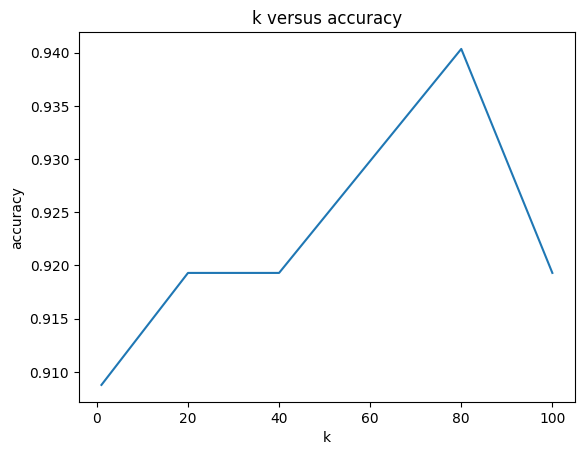

In [30]:
plt.plot(k_list, accuracy_list)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('k versus accuracy')

In [29]:
""" (10 pts) """
# Calculating the components needed for the slope formula
n = len(k_list)
sum_x = np.sum(k_list)
sum_y = np.sum(accuracy_list)
sum_xy = np.sum(np.array(k_list) * np.array(accuracy_list))
sum_x_squared = np.sum(np.array(k_list)**2)

# Calculating the slope
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)

# slope should at least not be negative
assert m > -0.05